<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Vitor Moura de Oliveira*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [22]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
# !gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

In [53]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import plotly_express as px

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
df.head()

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801


## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [24]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)
df.describe()

,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,301.133333,449.450000,34.230939,4.007533,5.300000,4.499632,10.045957
std,120.896295,182.619121,10.164913,1.156751,2.109703,1.486718,3.413248
min,90.000000,126.000000,20.177732,1.834201,1.000000,1.952083,4.680899
25%,196.500000,298.750000,24.860077,3.078881,3.750000,3.329572,6.915095
50%,319.500000,456.000000,34.381987,4.027289,5.000000,4.530517,10.039833
75%,401.250000,616.000000,43.013749,4.890745,6.250000,5.748005,13.282681
max,517.000000,769.000000,50.496714,5.996747,10.000000,7.075193,16.360085


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data                             60 non-null     object 
 1   Visitantes Únicos                60 non-null     float64
 2   Sessões                          60 non-null     float64
 3   Taxa de Rejeição (%)             60 non-null     float64
 4   Páginas por Sessão               60 non-null     float64
 5   Principais Origens do Tráfego    60 non-null     object 
 6   Dispositivos                     60 non-null     object 
 7   Eventos                          60 non-null     int64  
 8   Taxa de Conversão (%)            60 non-null     float64
 9   Tempo Médio de Sessão (minutos)  60 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.8+ KB


In [25]:
df.loc[df['Sessões'] == df['Sessões'].max()]

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
59,2023-03-01,517.0,769.0,20.975545,5.834554,Direto,Mobile,6,7.075193,16.360085


In [26]:
df.loc[df['Sessões'] == df['Sessões'].min()]

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516


In [27]:
df['Eventos'].value_counts()

Eventos
6     14
5     10
3     10
4      6
7      6
9      5
2      4
8      3
10     1
1      1
Name: count, dtype: int64

In [28]:
df.loc[df['Taxa de Conversão (%)'] == df['Taxa de Conversão (%)'].max()]

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
59,2023-03-01,517.0,769.0,20.975545,5.834554,Direto,Mobile,6,7.075193,16.360085


#### Ponto de partida
Vamos considerar, a partir do gráfico abaixo, que as mudanças na página ocorreram no registro '30' ('2023-01-31'), dada a diminuição brusca da taxa de rejeição e maior aceleração no aumento de sessões começando desse registro.

<Axes: >

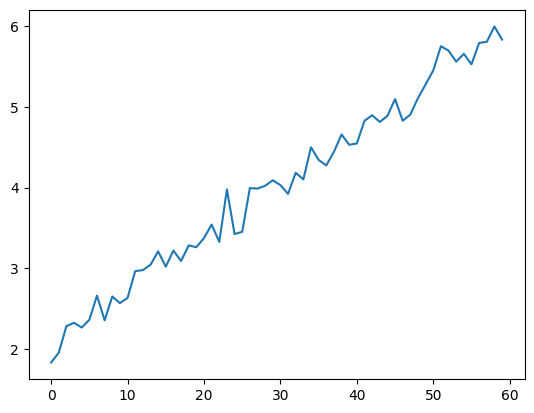

In [71]:
df['Páginas por Sessão'].plot()

<Axes: >

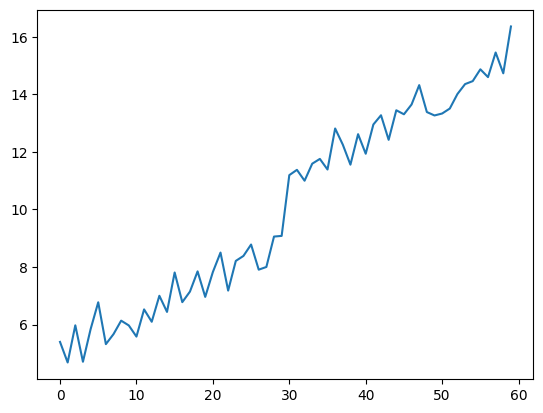

In [72]:
df['Tempo Médio de Sessão (minutos)'].plot()

<Axes: >

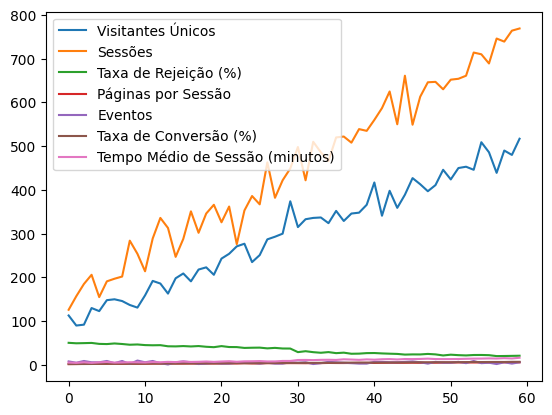

In [35]:
df.plot()

<Axes: >

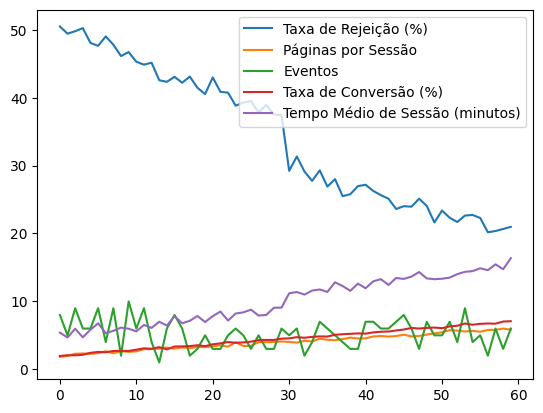

In [77]:
df2 = df.drop(columns=['Sessões', 'Visitantes Únicos'])
df2.plot()

In [65]:
df['Data'].iloc[30]

'2023-01-31'

In [73]:
#quanto do tempo médio por sessão 'justifica' a taxa de rejeição
df['Tempo Médio de Sessão (minutos)'].corr(df['Taxa de Rejeição (%)'])

-0.9820358882055583

<Axes: >

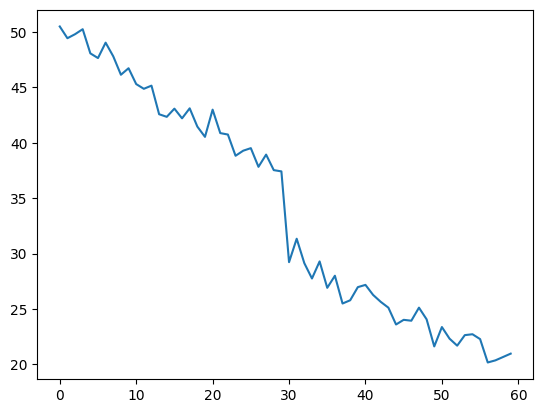

In [74]:
df['Taxa de Rejeição (%)'].plot()

<Axes: xlabel='Eventos'>

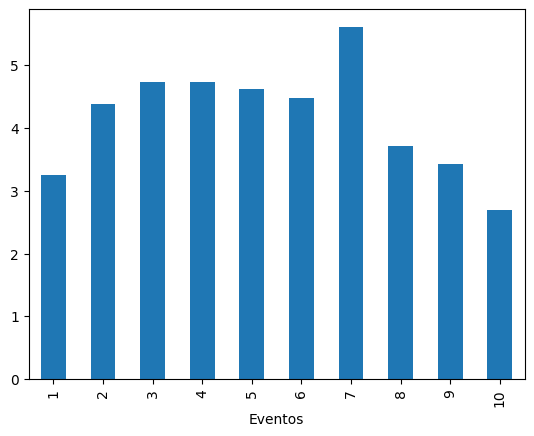

In [36]:
taxaconv_evento = df.groupby('Eventos')['Taxa de Conversão (%)'].mean()
taxaconv_evento.plot(kind='bar')

In [51]:
mean_rejection_rate_pre_change = df.iloc[:30]['Taxa de Rejeição (%)'].mean()
mean_rejection_rate_post_change = df.iloc[30:]['Taxa de Rejeição (%)'].mean()

print(mean_rejection_rate_pre_change,"->" ,mean_rejection_rate_post_change)

43.6677853075388 -> 24.794091766998196


In [54]:
rejratedrop = mean_rejection_rate_post_change/mean_rejection_rate_pre_change
observed_difference = mean_rejection_rate_post_change - mean_rejection_rate_pre_change
print(rejratedrop, observed_difference)

0.5677890827845063 -18.873693540540604


### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [60]:
# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Taxa de Rejeição (%)'].std()

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)
px.histogram(simulated_effects)

In [61]:
base_rejection_rate = mean_rejection_rate_pre_change

new_rejection_rates = base_rejection_rate + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_rejection_rates)
percentile_5th = np.percentile(new_rejection_rates, 5)
percentile_95th = np.percentile(new_rejection_rates, 95)

# Criar DataFrame para o Plotly
data = pd.DataFrame({
    'New Rejection Rates': new_rejection_rates
})

In [62]:
fig = px.histogram(data, x='New Rejection Rates', nbins=50, title='Distribuição Simulada das Novas Taxas de Rejeição')
fig.add_vline(x=average_new_rejection_rate, line_dash="dash", line_color="red", annotation_text="Média")
fig.add_vline(x=percentile_5th, line_dash="dash", line_color="green", annotation_text="5º Percentil")
fig.add_vline(x=percentile_95th, line_dash="dash", line_color="green", annotation_text="95º Percentil")
fig.update_layout(xaxis_title='Taxa de Rejeição (%)', yaxis_title='Frequência')
fig.show()

### tipo 2

In [64]:
df.head()

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801


In [69]:
data_inicio_mudancas = '2023-01-31'
# Separar dados antes e depois das mudanças
df_antes = df[df['Data'] < data_inicio_mudancas]
df_depois = df[df['Data'] >= data_inicio_mudancas]

# Calcular estatísticas para a Taxa de Rejeição (%)
media_antes_rejeicao = df_antes['Taxa de Rejeição (%)'].mean()
media_depois_rejeicao = df_depois['Taxa de Rejeição (%)'].mean()
std_antes_rejeicao = df_antes['Taxa de Rejeição (%)'].std()
std_depois_rejeicao = df_depois['Taxa de Rejeição (%)'].std()

# Função de simulação que separa as contribuições de UI e velocidade
def simular_impacto_detalhado(n_simulacoes):
    resultados_rejeicao = []
    detalhes_contribuicoes = []

    for _ in range(n_simulacoes):
        contribuicao_ui = np.random.uniform(0, 1)
        contribuicao_velocidade = np.random.uniform(0, 1 - contribuicao_ui)  # Garante que a soma não ultrapassa 100%

        ajuste_por_ui = (media_depois_rejeicao - media_antes_rejeicao) * contribuicao_ui
        ajuste_por_velocidade = (media_depois_rejeicao - media_antes_rejeicao) * contribuicao_velocidade

        nova_taxa_rejeicao = np.random.normal(media_antes_rejeicao + ajuste_por_ui + ajuste_por_velocidade, std_depois_rejeicao)
        resultados_rejeicao.append(nova_taxa_rejeicao)
        detalhes_contribuicoes.append((contribuicao_ui, contribuicao_velocidade, abs(ajuste_por_ui), abs(ajuste_por_velocidade)))

    return resultados_rejeicao, detalhes_contribuicoes

# Executar simulação
n_simulacoes = 10000
resultados_rejeicao_simulada, contribuicoes_simuladas = simular_impacto_detalhado(n_simulacoes)

# Criar DataFrame para os resultados das simulações
data_resultados = pd.DataFrame({
    'Taxas de Rejeição Simuladas': resultados_rejeicao_simulada
})

# Histograma das Taxas de Rejeição Simuladas
fig_rejeicao = px.histogram(data_resultados, x='Taxas de Rejeição Simuladas', nbins=50,
                            title='Distribuição das Taxas de Rejeição Simuladas após Mudanças',
                            labels={'Taxas de Rejeição Simuladas': 'Taxa de Rejeição (%)'},
                            opacity=0.8)
fig_rejeicao.add_vline(x=media_antes_rejeicao, line_dash="dash", line_color="red", annotation_text="Média Antes")
fig_rejeicao.add_vline(x=media_depois_rejeicao, line_dash="dash", line_color="green", annotation_text="Média Depois")
fig_rejeicao.update_layout(xaxis_title='Taxa de Rejeição (%)', yaxis_title='Frequência')
fig_rejeicao.show()

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [78]:
df2.columns

Index(['Data', 'Taxa de Rejeição (%)', 'Páginas por Sessão',
       'Principais Origens do Tráfego', 'Dispositivos', 'Eventos',
       'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'],
      dtype='object')

In [79]:
dfsensi = df2.drop(columns=['Data', 'Páginas por Sessão',
       'Principais Origens do Tráfego', 'Dispositivos', 'Eventos',
       'Taxa de Conversão (%)'])

<Axes: >

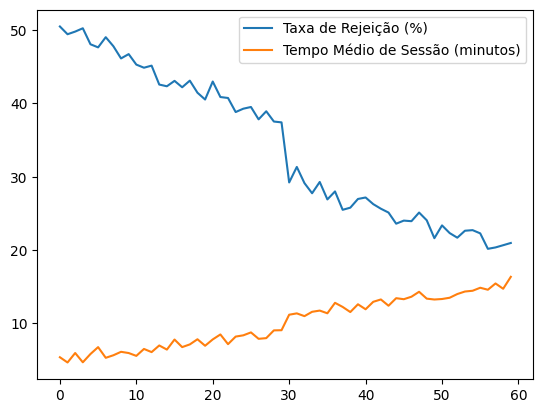

In [81]:
dfsensi.plot()

In [85]:
#quanto do tempo médio por sessão 'justifica' a taxa de rejeição
corr = df['Tempo Médio de Sessão (minutos)'].corr(df['Taxa de Rejeição (%)'])

-0.9820358882055583

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.